# **Time Series Analysis**

----
----

### **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


---

### **1. Publication Frequency Over Time:**

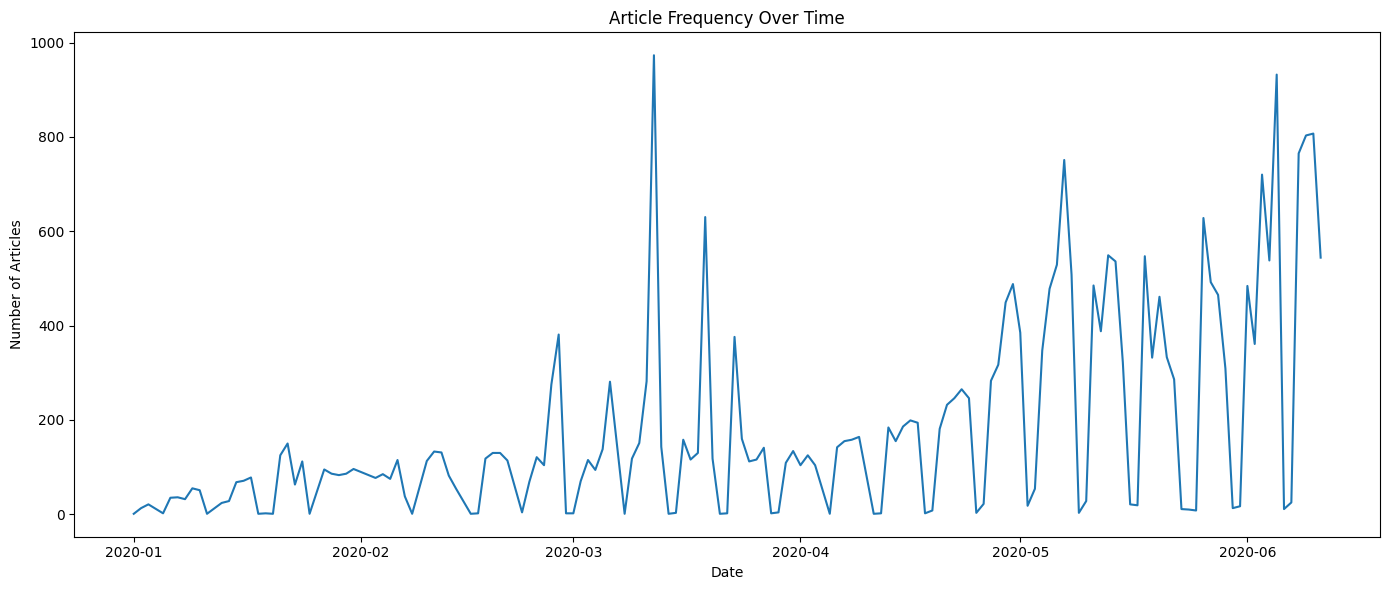

In [3]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Group by date (ignore time) and count articles per day
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()

# Plot article frequency trends
plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

### **Summary: Article Frequency Over Time**

- The analysis of article frequency over time shows significant daily variation in publication volume within the dataset.

- Most days see a modest number of articles, but there are notable spikes, such as over 800 articles published on certain days in June 2020.

- These surges may correspond to major market events or reporting deadlines, while other days have far fewer articles, indicating quieter news cycles.

- Recognizing these patterns helps in understanding the flow of financial news and can guide the timing of monitoring and analysis efforts.

----

### **2. Publishing Time Analysis**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7680\4273881795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


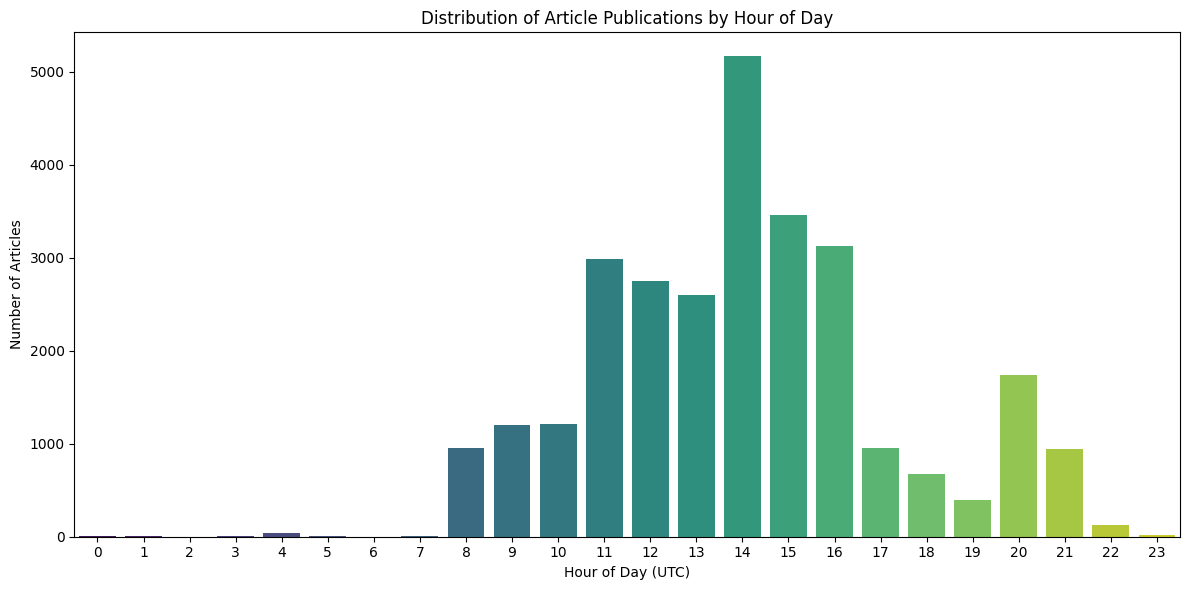

In [4]:
# Extract the hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Count the number of articles published in each hour
hourly_counts = df['hour'].value_counts().sort_index()

# Plot the distribution of publication times
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Distribution of Article Publications by Hour of Day')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### **Summary: Distribution of Article Publications by Hour of Day**

- The distribution of article publications by hour of day shows a clear concentration of publishing activity during standard business hours.

- The majority of articles are published between 8 AM and 5 PM UTC, with a pronounced peak at 2 PM (hour 14), where over 5,000 articles are released. There are also significant publication counts at 11 AM, 12 PM, 1 PM, and 3 PM.

- Early morning (before 8 AM) and late-night hours (after 8 PM) see very few articles, indicating that editorial activity is minimal outside of typical working hours.

- This pattern aligns with financial market hours and suggests that newsrooms focus their efforts during periods of high market activity, which is important for optimizing news monitoring and alert systems.